In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

import imp
import sys
sys.path.insert(0, '/home/bsaldivar/Software/Python/MyLibraries')

import model_score_plot
imp.reload(model_score_plot)
from model_score_plot import ModelScorePlot as MSP

import plot_confusion_matrix_compact
imp.reload(plot_confusion_matrix_compact)
from plot_confusion_matrix_compact import plot_confusion_matrix

In [7]:
dataset_dir='/home/bsaldivar/Software/Python/Datasets/Biology'
dataset_file='/algae_base_sp_bw_50x50_all.npy'
dataset_location = dataset_dir+'/'+dataset_file
dataset_np = np.load(dataset_location)
print(dataset_np.shape)

X = dataset_np[:,:-1]
y = (dataset_np[:,-1:]).flatten()
print(X.shape,y.shape)

(2376, 2501)
(2376, 2500) (2376,)


In [5]:
msp = MSP()

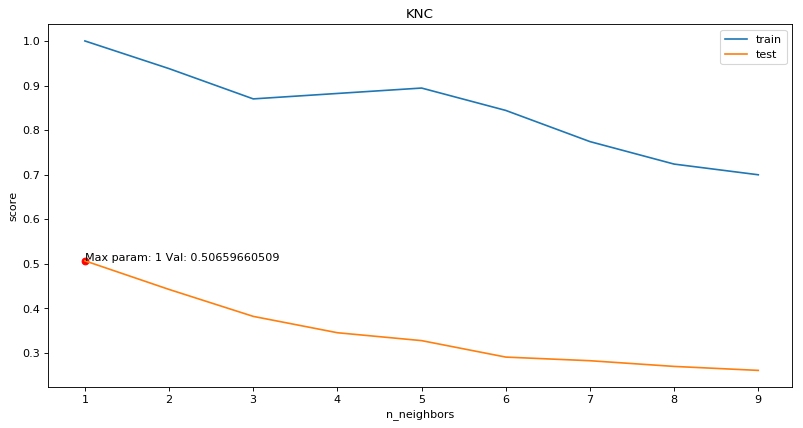

,best_param,model,param_name,test_score,train_score,weighted_score
0,1,KNC,n_neighbors,0.506597,1.0,0.671064


In [10]:
knc_df=msp.kncScores(X,y,cv=5,param_name='n_neighbors',paramRange=(1,10,1),trainW=1,testW=2,title='KNC',plot=True)
knc_df

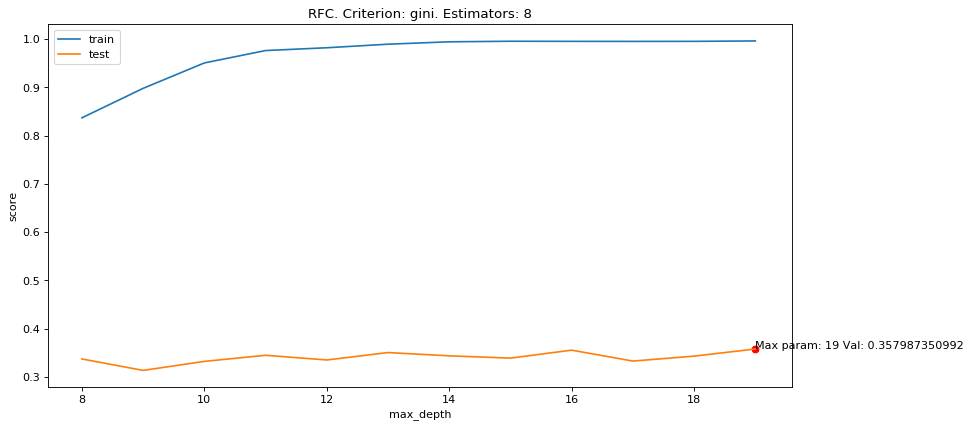

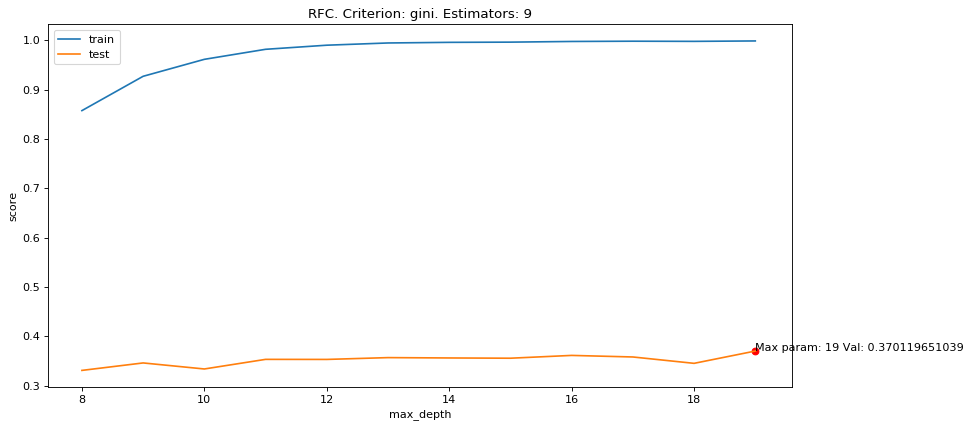

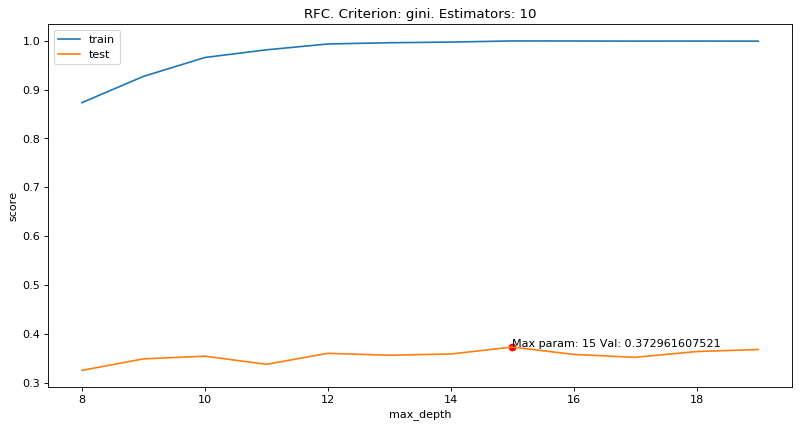

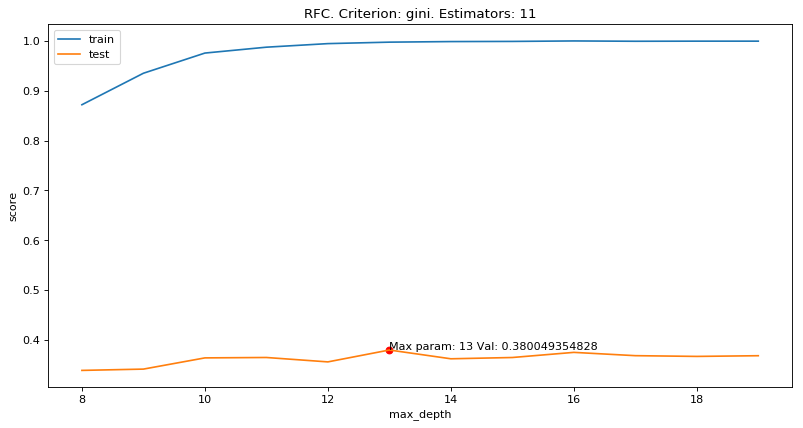

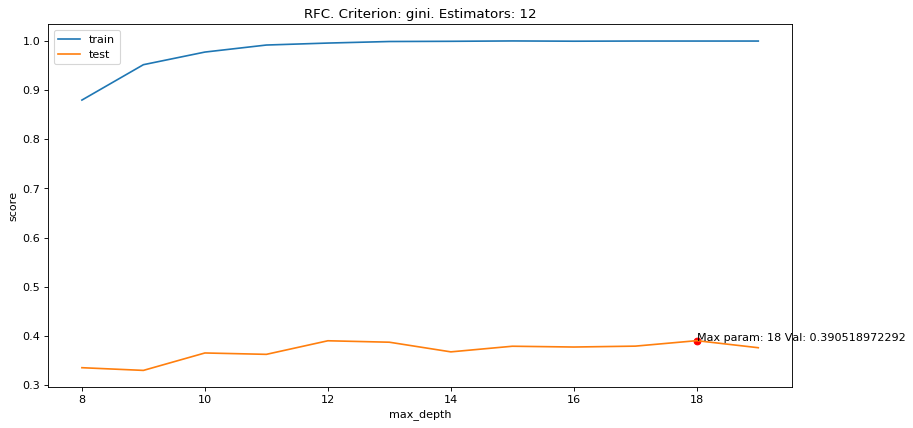

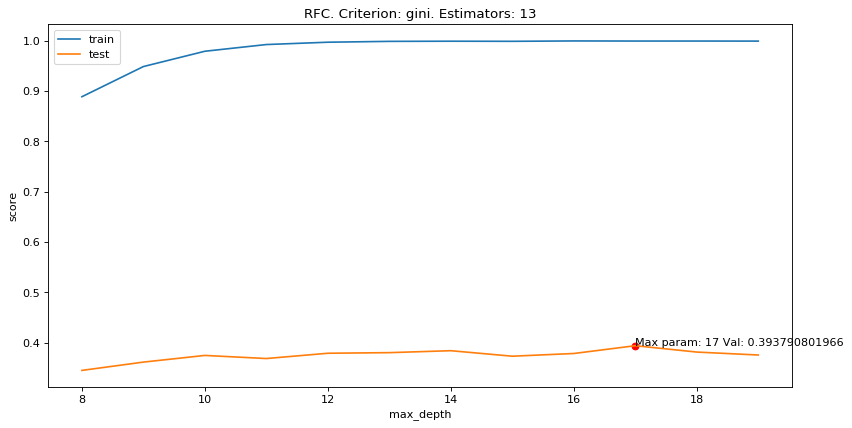

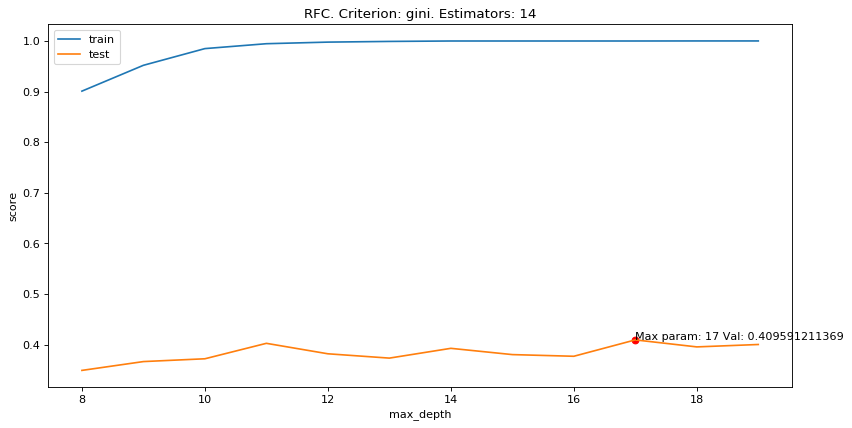

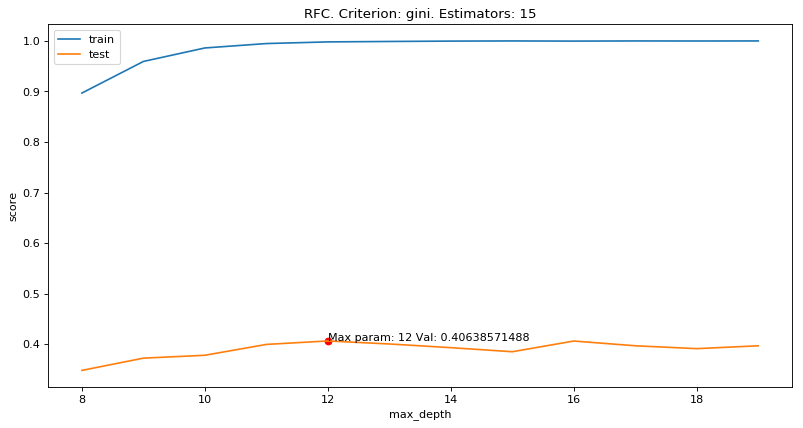

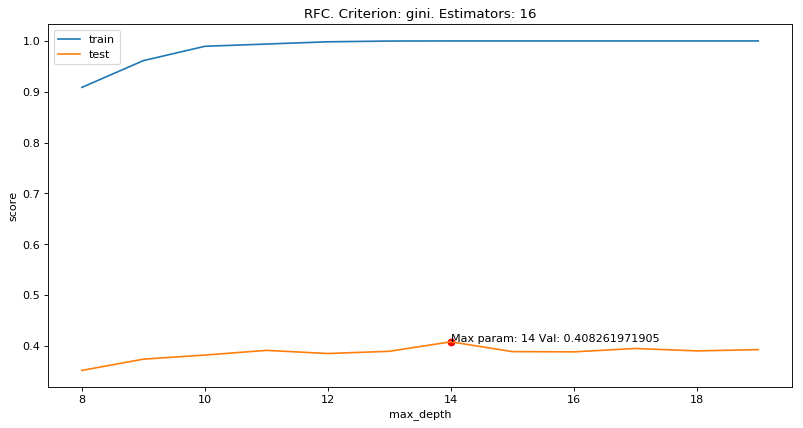

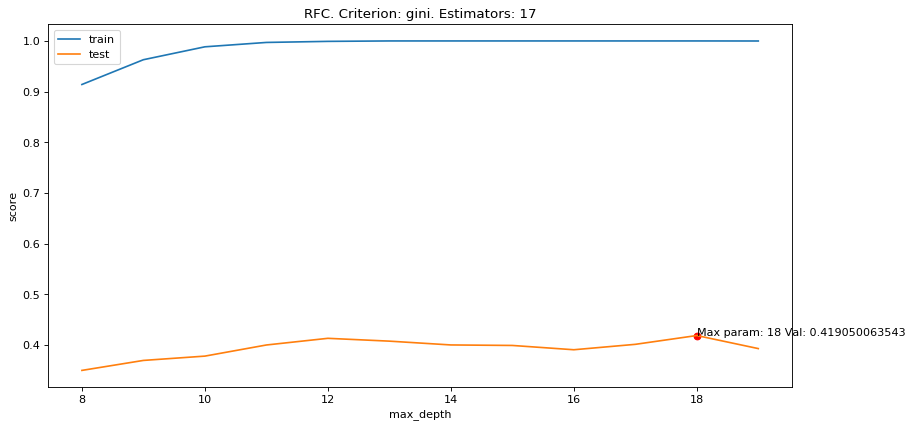

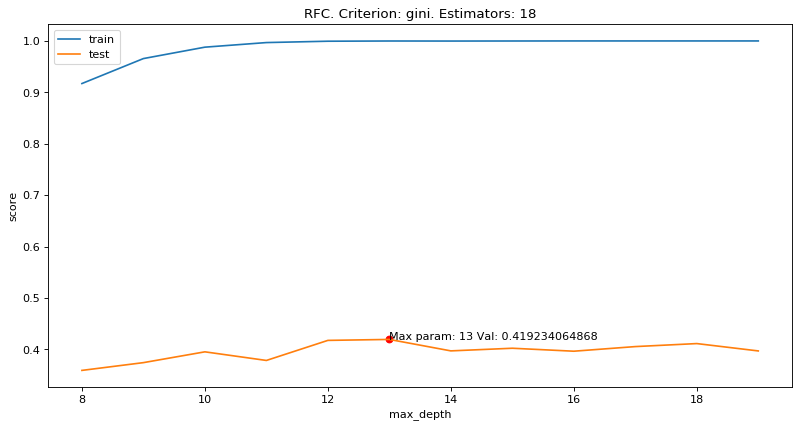

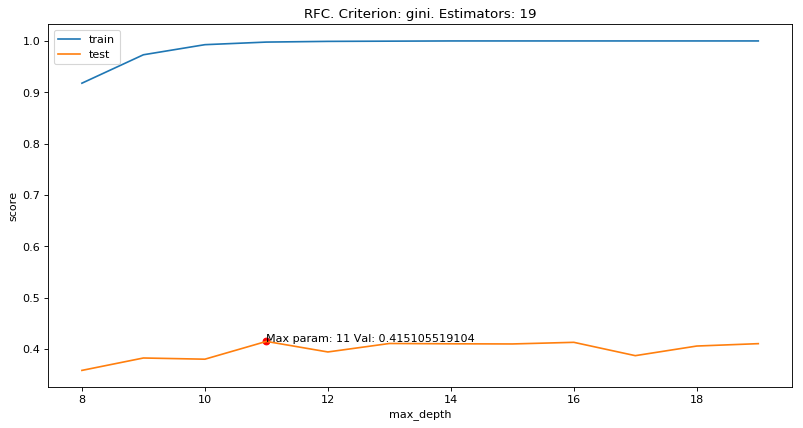

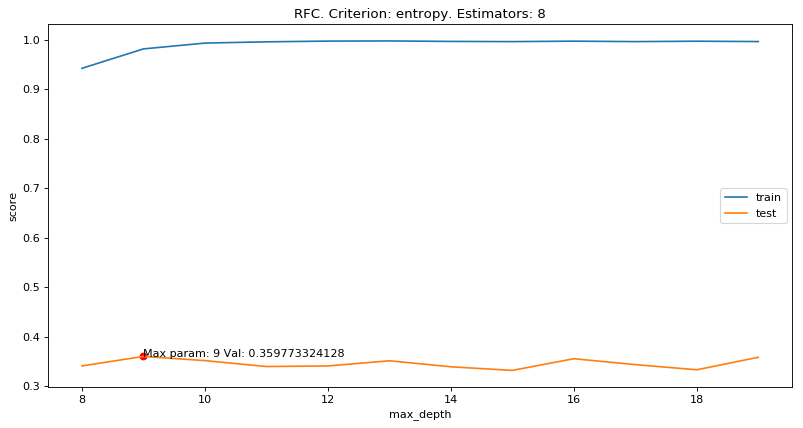

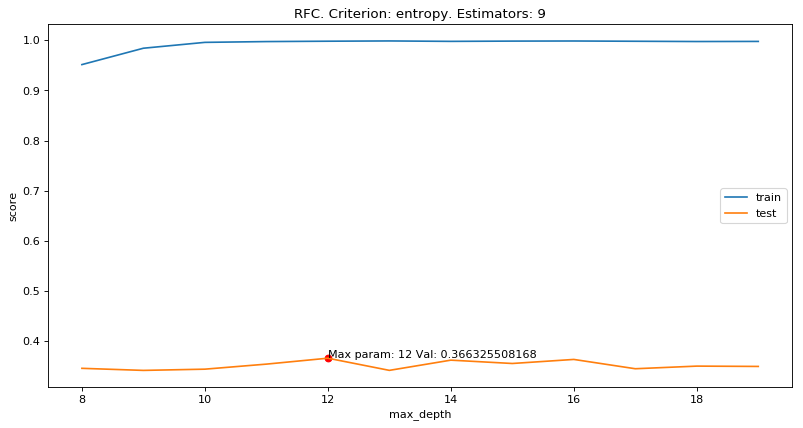

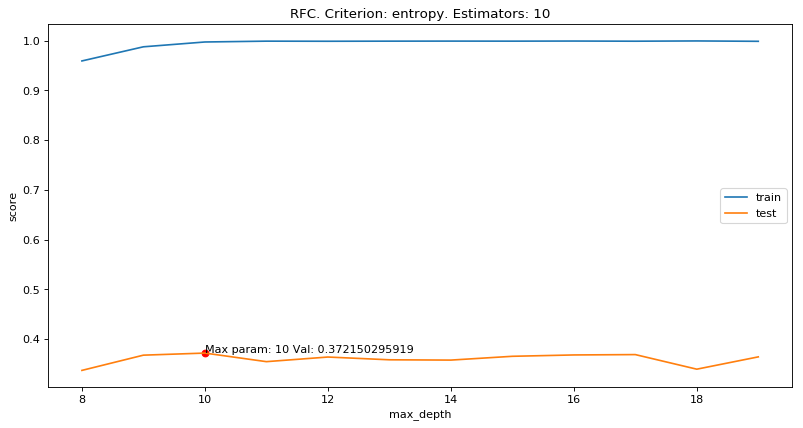

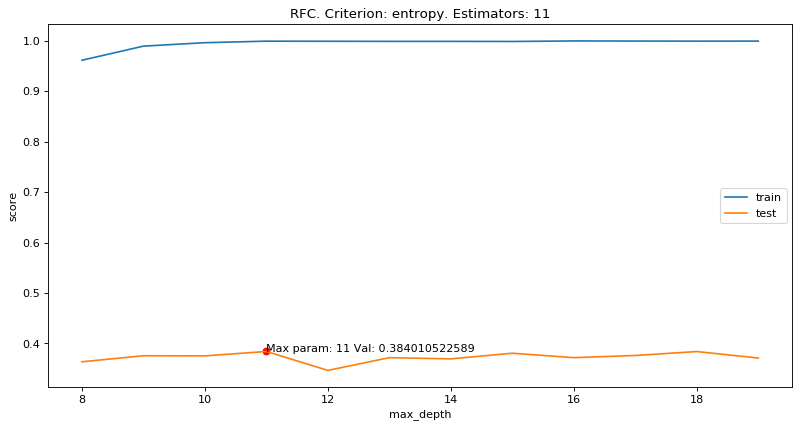

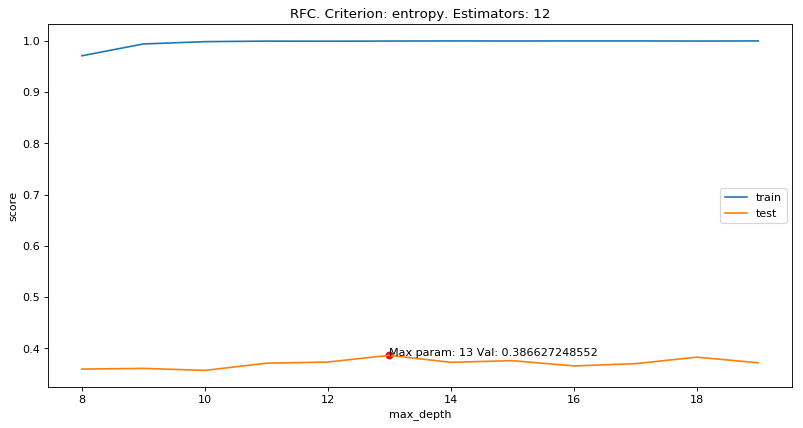

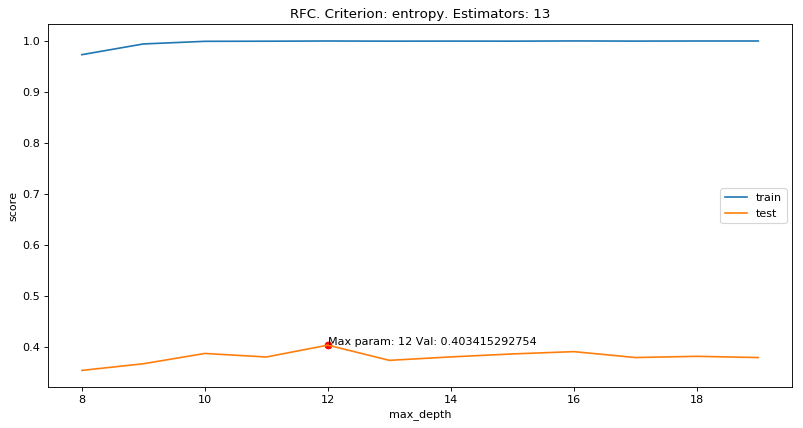

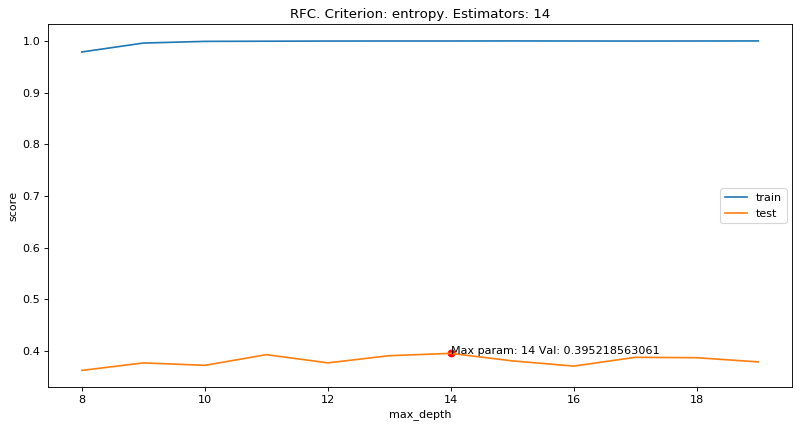

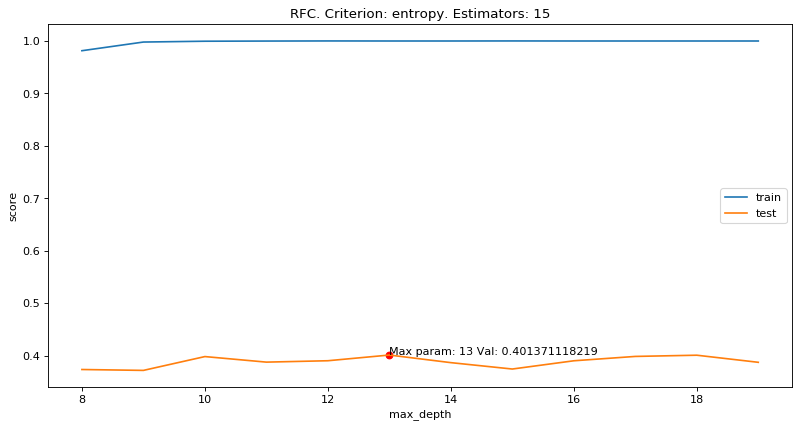

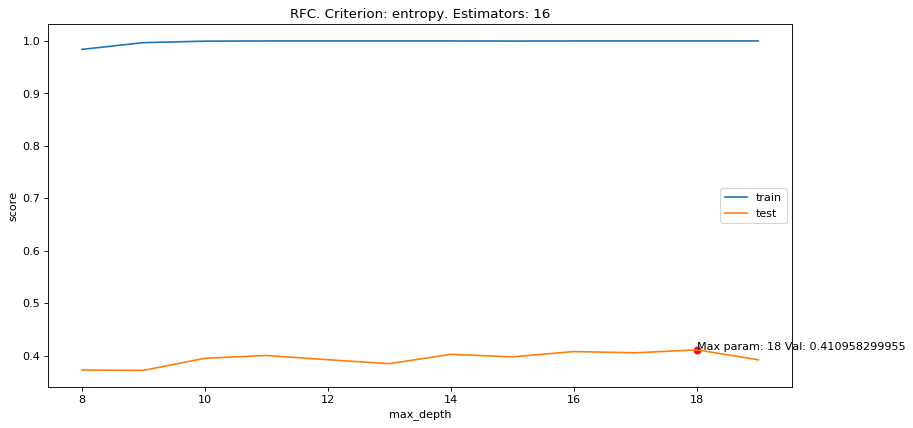

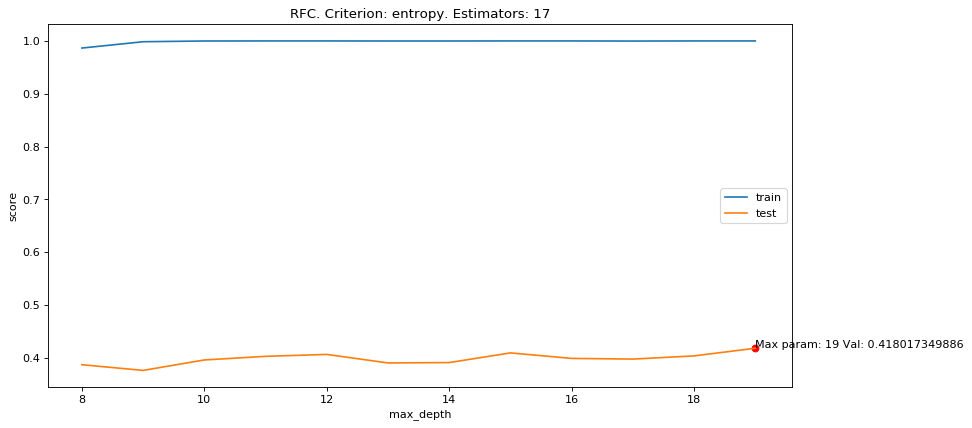

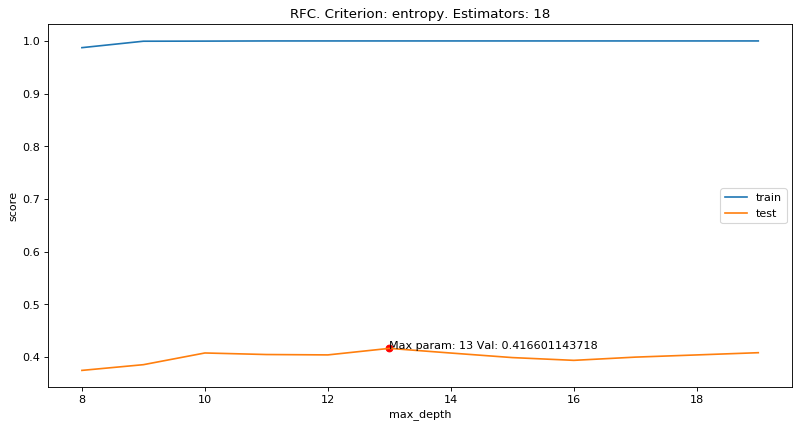

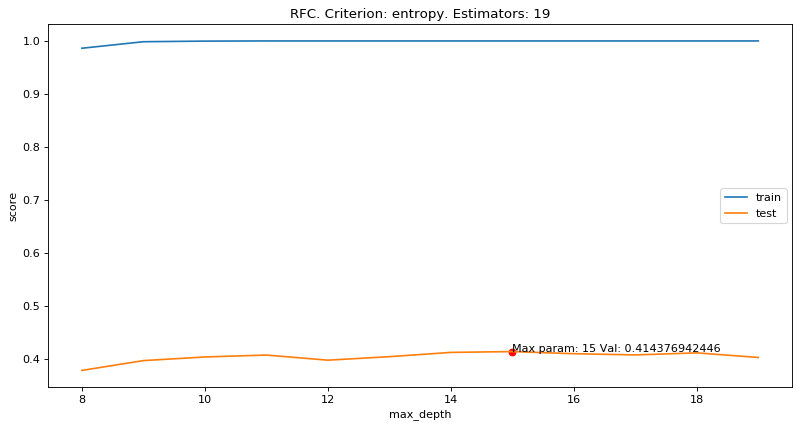

,best_param,model,param_name,test_score,train_score,weighted_score
10,13,RFC. Criterion: gini. Estimators: 18,max_depth,0.419234,0.999895,0.612788
9,18,RFC. Criterion: gini. Estimators: 17,max_depth,0.419050,1.000000,0.612700
21,19,RFC. Criterion: entropy. Estimators: 17,max_depth,0.418017,1.000000,0.612012
22,13,RFC. Criterion: entropy. Estimators: 18,max_depth,0.416601,1.000000,0.611067
23,15,RFC. Criterion: entropy. Estimators: 19,max_depth,0.414377,1.000000,0.609585
11,11,RFC. Criterion: gini. Estimators: 19,max_depth,0.415106,0.997789,0.609333
20,18,RFC. Criterion: entropy. Estimators: 16,max_depth,0.410958,1.000000,0.607306
6,17,RFC. Criterion: gini. Estimators: 14,max_depth,0.409591,0.999789,0.606324
8,14,RFC. Criterion: gini. Estimators: 16,max_depth,0.408262,1.000000,0.605508
7,12,RFC. Criterion: gini. Estimators: 15,max_depth,0.406386,0.998107,0.603626


In [15]:
rfc_df=msp.rfcScores(X, y, cv=5, param_name='max_depth', estimatorsRange=(8, 20, 1), paramRange=(8, 20, 1), trainW=1, testW=2, title='RFC', plot=True)  
rfc_df

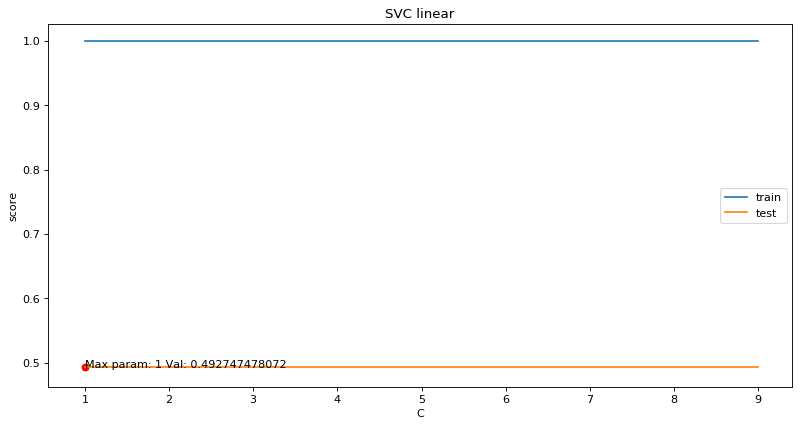

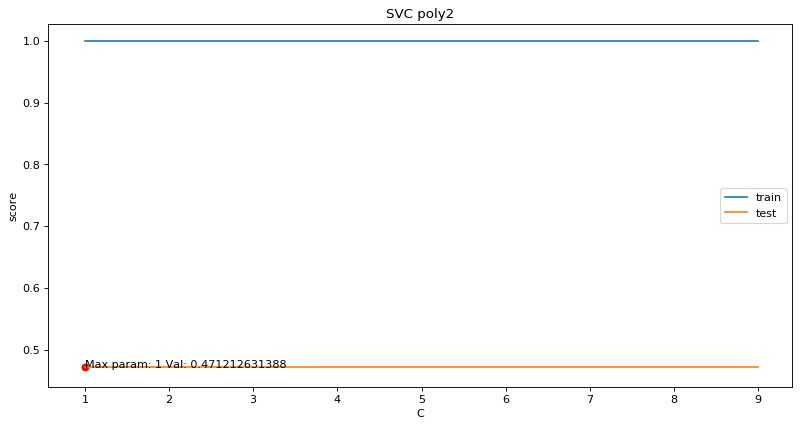

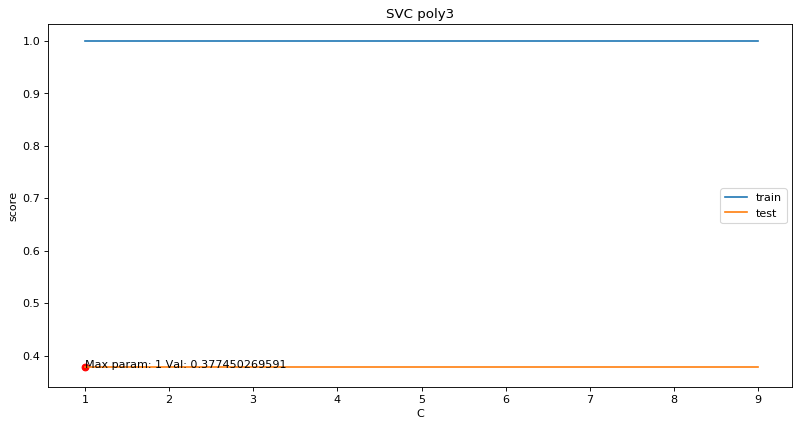

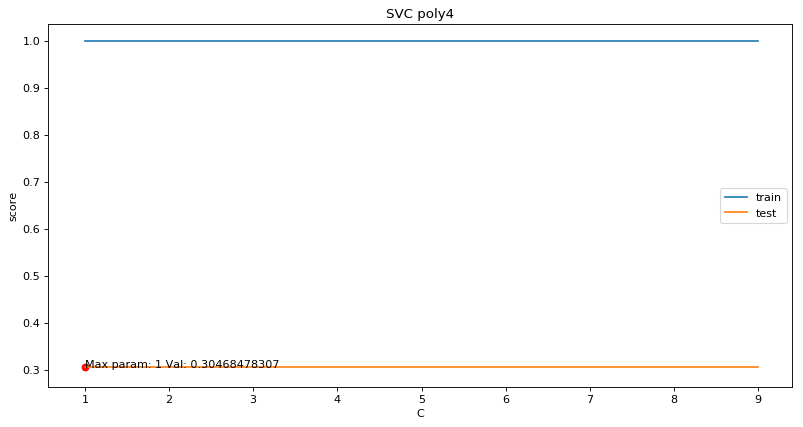

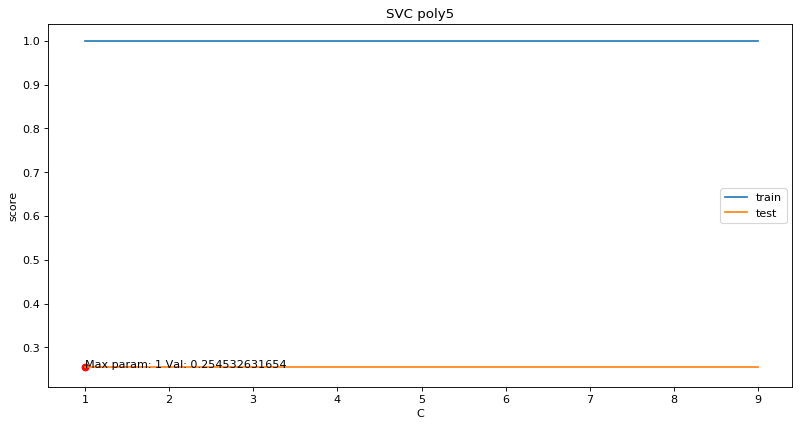

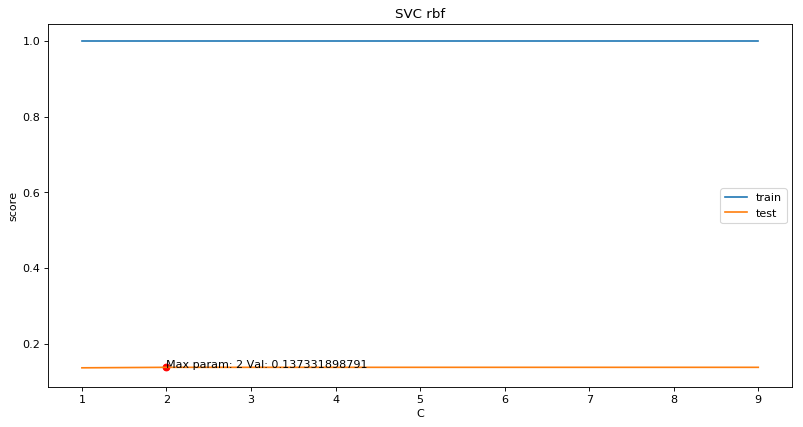

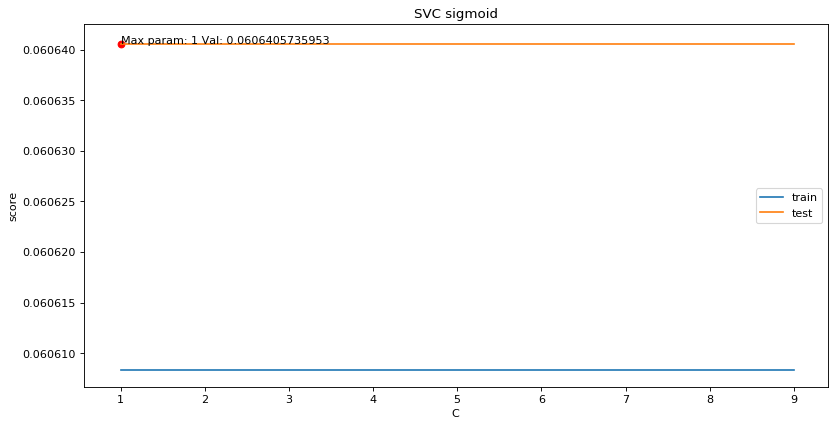

,best_param,model,param_name,test_score,train_score,weighted_score
0,1,SVC linear,C,0.492747,1.000000,0.661832
1,1,SVC poly2,C,0.471213,1.000000,0.647475
2,1,SVC poly3,C,0.377450,1.000000,0.584967
3,1,SVC poly4,C,0.304685,1.000000,0.536457
4,1,SVC poly5,C,0.254533,1.000000,0.503022
5,2,SVC rbf,C,0.137332,1.000000,0.424888
6,1,SVC sigmoid,C,0.060641,0.060608,0.060630


In [17]:
svc_df = msp.svcScores( X, y, cv=5, param_name='C', max_iter=5000, degrees=(2, 6, 1), paramRange=(1, 10, 1), trainW=1, testW=2, plot=True)
svc_df

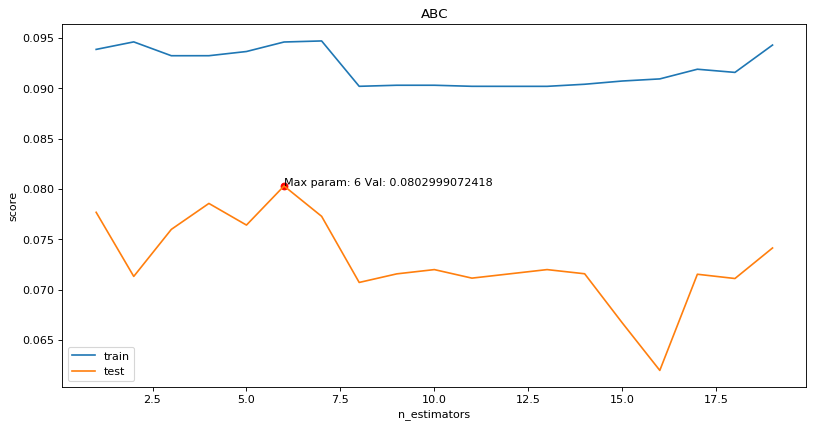

,best_param,model,param_name,test_score,train_score,weighted_score
0,6,ABC,n_estimators,0.0803,0.094601,0.085067


In [18]:
abc_df = msp.abcScores(X, y, cv=5, param_name='n_estimators', paramRange=(1, 20, 1), trainW=1, testW=2, title='ABC', plot=True)
abc_df

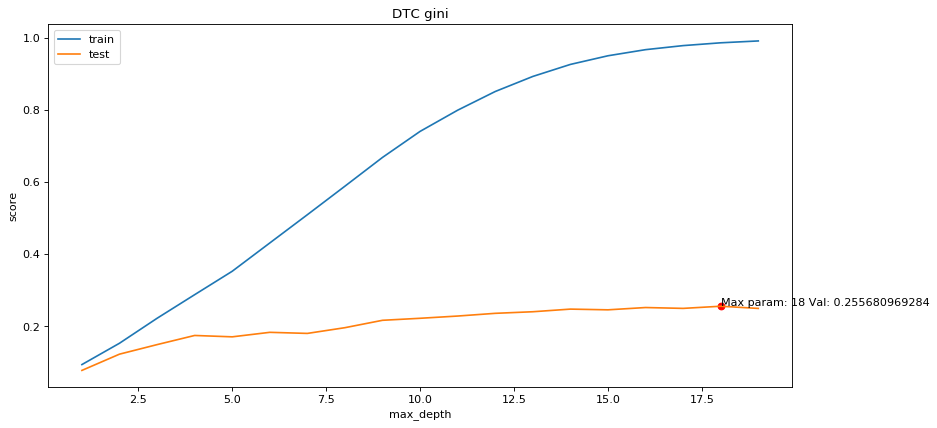

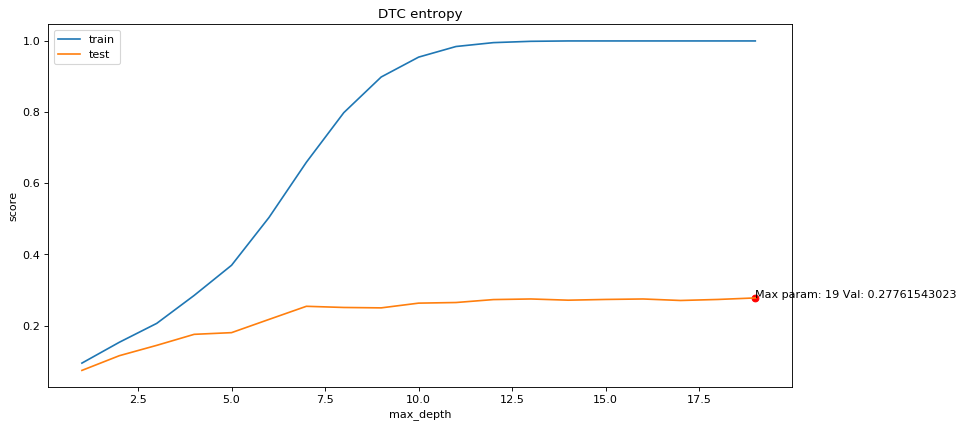

,best_param,model,param_name,test_score,train_score,weighted_score
1,19,DTC entropy,max_depth,0.277615,1.000000,0.518410
0,18,DTC gini,max_depth,0.255681,0.986444,0.499269


In [19]:
dtc_df = msp.dtcScores(X, y, cv=5, param_name='max_depth', paramRange=(1, 20, 1), trainW=1, testW=2, title='DTC', plot=True)
dtc_df

In [21]:
dfl = [knc_df,rfc_df,svc_df,abc_df,dtc_df]
df_all = pd.concat(dfl,axis=0)
df_all.to_csv('/home/bsaldivar/Software/Python/Datasets/Biology/knc_rfc_svc_abc_dtc.csv',sep=",")

In [22]:
df_all

,best_param,model,param_name,test_score,train_score,weighted_score
0,1,KNC,n_neighbors,0.506597,1.000000,0.671064
10,13,RFC. Criterion: gini. Estimators: 18,max_depth,0.419234,0.999895,0.612788
9,18,RFC. Criterion: gini. Estimators: 17,max_depth,0.419050,1.000000,0.612700
21,19,RFC. Criterion: entropy. Estimators: 17,max_depth,0.418017,1.000000,0.612012
22,13,RFC. Criterion: entropy. Estimators: 18,max_depth,0.416601,1.000000,0.611067
23,15,RFC. Criterion: entropy. Estimators: 19,max_depth,0.414377,1.000000,0.609585
11,11,RFC. Criterion: gini. Estimators: 19,max_depth,0.415106,0.997789,0.609333
20,18,RFC. Criterion: entropy. Estimators: 16,max_depth,0.410958,1.000000,0.607306
6,17,RFC. Criterion: gini. Estimators: 14,max_depth,0.409591,0.999789,0.606324
8,14,RFC. Criterion: gini. Estimators: 16,max_depth,0.408262,1.000000,0.605508


In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[ 8  0  0 ...,  0  0  0]
 [ 0 13  0 ...,  0  0  0]
 [ 0  0  1 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 27  0  0]
 [ 0  0  0 ...,  0 16  0]
 [ 0  0  0 ...,  0  0  7]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         8
        1.0       1.00      1.00      1.00        13
        2.0       1.00      0.09      0.17        11
        3.0       0.00      0.00      0.00        12
        4.0       0.92      0.72      0.81        32
        5.0       1.00      1.00      1.00         8
        6.0       0.68      0.70      0.69        30
        7.0       0.00      0.00      0.00         9
        8.0       0.00      0.00      0.00         8
        9.0       1.00      1.00      1.00         8
       10.0       1.00      0.86      0.92        14
       11.0       0.59      1.00      0.74        27
       12.0       1.00      0.67      0.80        36
       13.0       1.00      1.00      1.00        20
       14.0       1.00      1.00      1.

/home/bsaldivar/miniconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


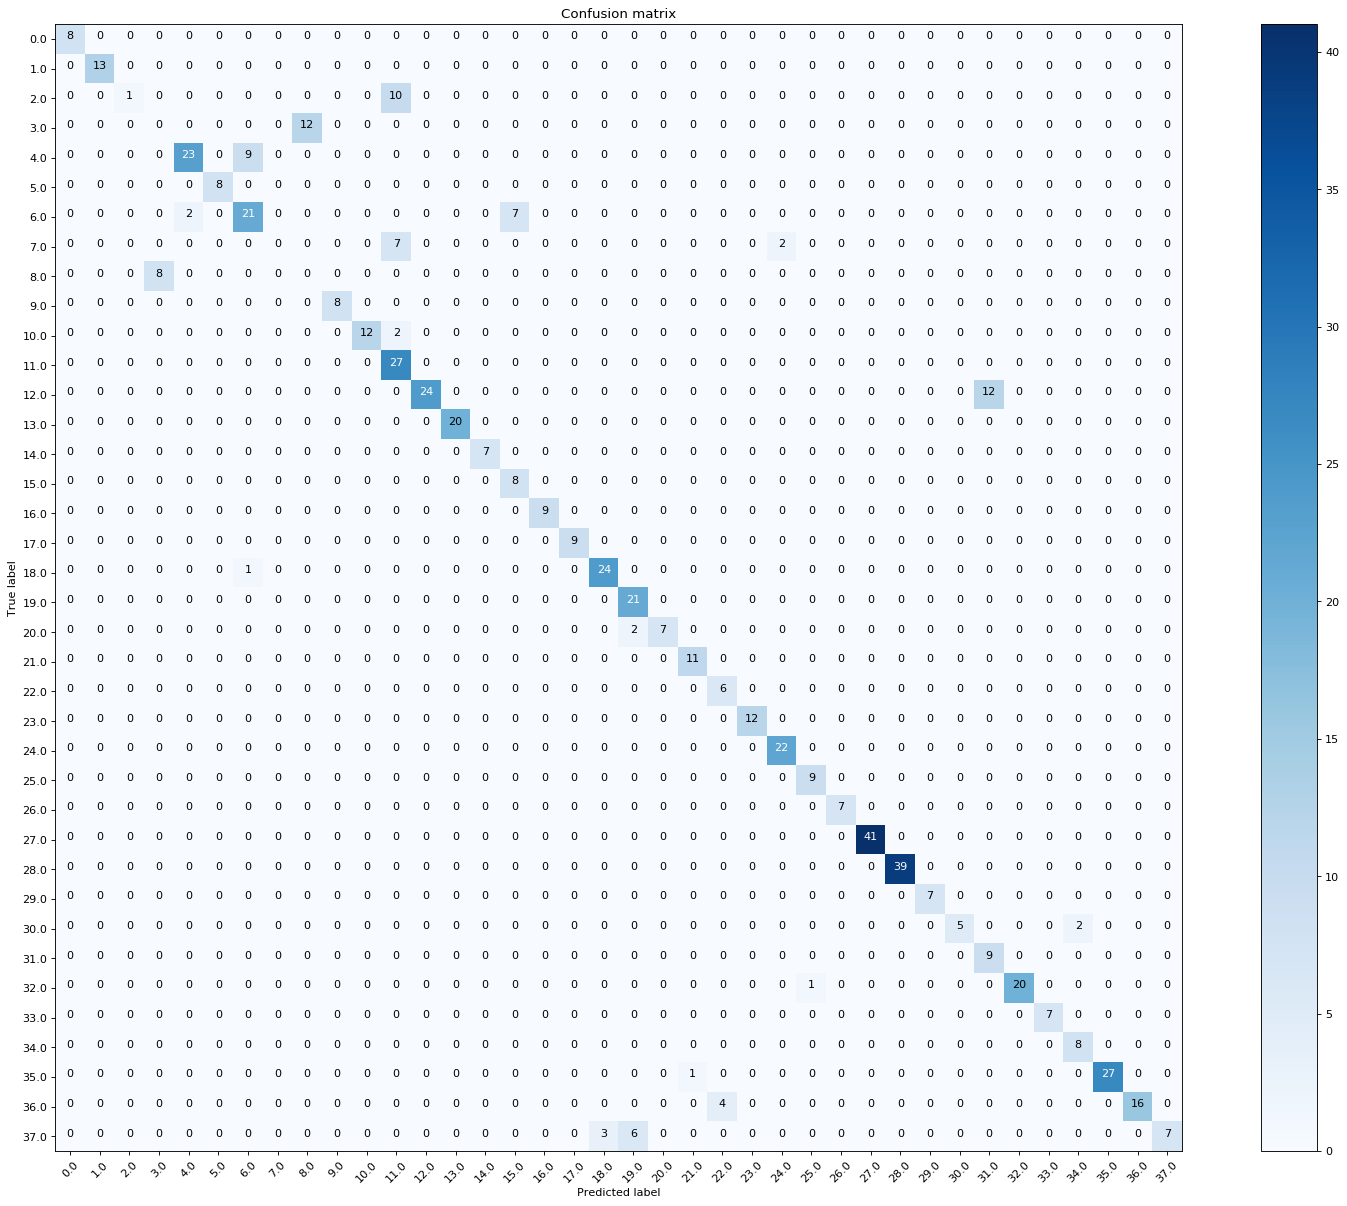

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf=KNC(n_neighbors=1)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

conf_matr=confusion_matrix(y_test, y_pred)

labels=list(set(y.tolist()))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(conf_matr,labels,normalize=False,figsize=(20,15),dpi=80)

[[ 7  0  0 ...,  0  0  0]
 [ 0 10  0 ...,  0  0  0]
 [ 0  0  2 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 16  0  0]
 [ 0  0  0 ...,  1 24  0]
 [ 0  0  0 ...,  0  0 15]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         7
        1.0       0.91      1.00      0.95        10
        2.0       1.00      0.18      0.31        11
        3.0       0.00      0.00      0.00         7
        4.0       0.62      0.90      0.73        20
        5.0       1.00      0.11      0.20         9
        6.0       0.50      0.68      0.58        31
        7.0       0.00      0.00      0.00         9
        8.0       0.67      0.17      0.27        12
        9.0       0.33      0.25      0.29         4
       10.0       1.00      0.08      0.15        12
       11.0       0.47      1.00      0.64        23
       12.0       0.71      0.82      0.76        45
       13.0       0.65      0.69      0.67        16
       14.0       1.00      0.62      0.

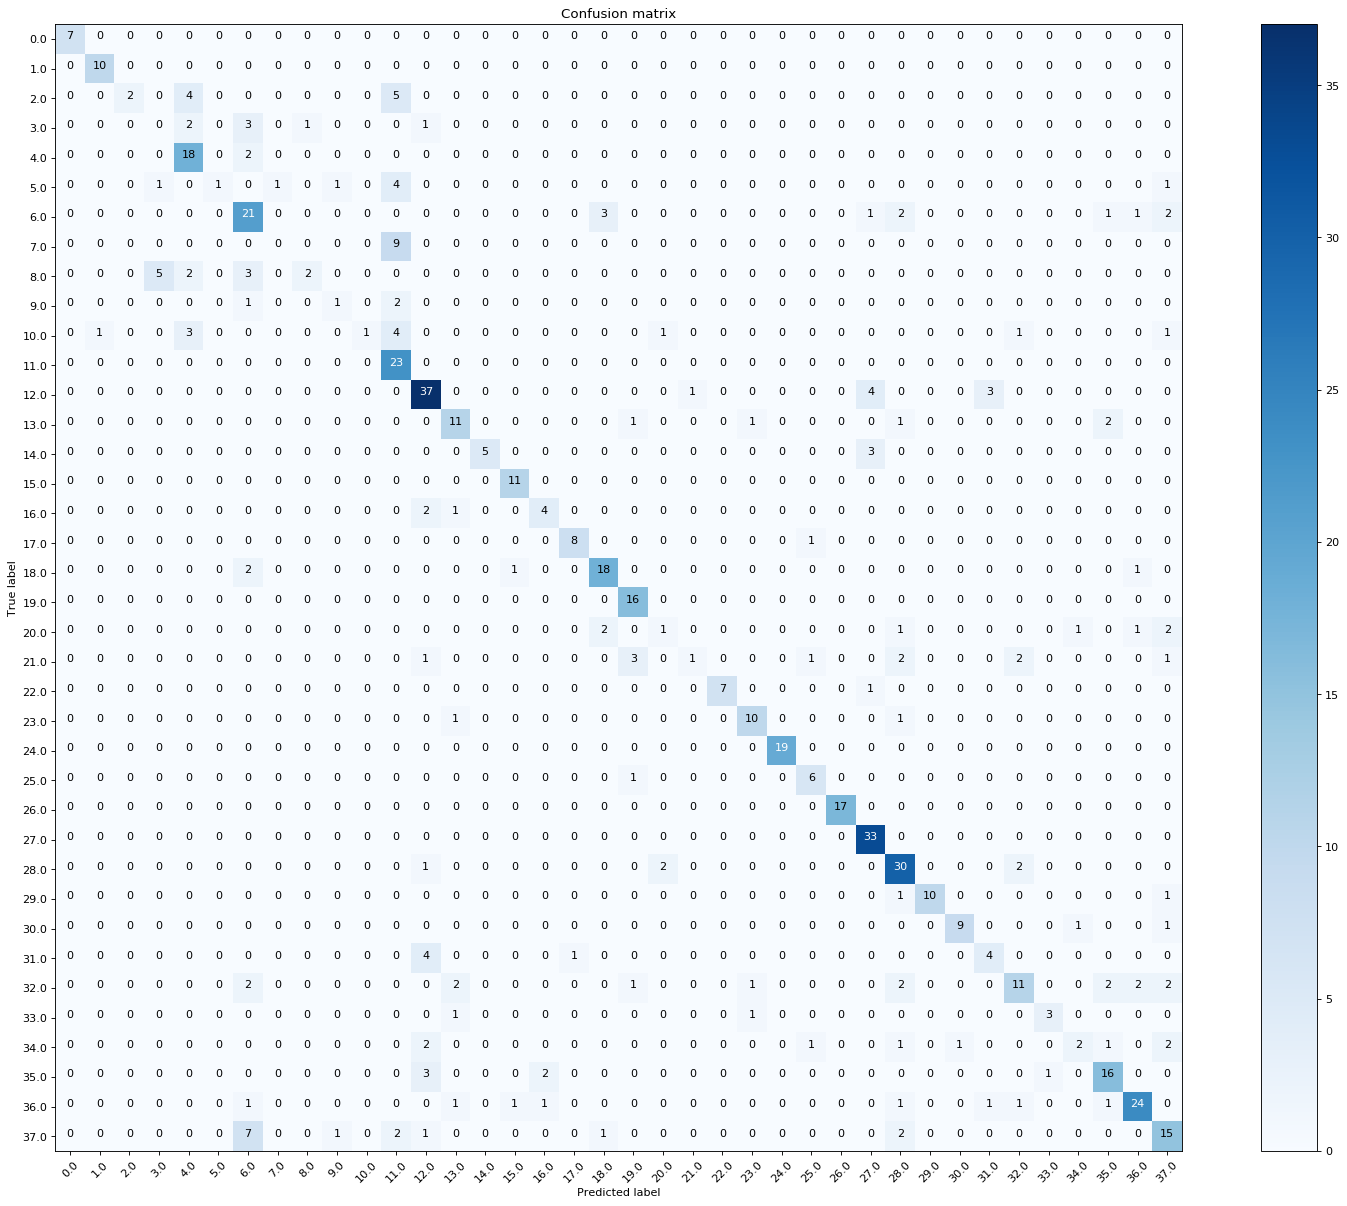

In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC

#13	RFC. Criterion: gini. Estimators: 18	max_depth
clf=RFC(max_depth=13,criterion='gini',n_estimators=18)

clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)

conf_matr=confusion_matrix(y_test, y_pred)

labels=list(set(y.tolist()))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(conf_matr,labels,normalize=False,figsize=(20,15),dpi=80)
